# Firm-Teacher_Clave-Direction_Classification Data Set

## Batch Gradient Descent with variable batch size

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Read dataset, divide it into train and test set
dataset = np.loadtxt("ClaveVectors_Firm-Teacher_Model.txt")
np.random.shuffle(dataset)

len_dataset = dataset.shape[0]
train = dataset[:int(0.75*len_dataset),:]
test = dataset[int(0.75*len_dataset):,:]

N = train.shape[0]
Nt = test.shape[0]
p = train[:,:16].shape[1]
out_neurons = train[:,16:].shape[1]

print("Original Dataset shape ",dataset.shape)
#print("Training set shape ",N,p)
#print("Test set shape ",Nt,pt)

print("Each Datapoint contains ",p,"features and belong to either of ",out_neurons,"class.")

Original Dataset shape  (10800, 20)
Each Datapoint contains  16 features and belong to either of  4 class.


In [3]:
def create_batches(dataset,batch_size = 100):
    batches = {}
    len_dataset = dataset.shape[0]
    start = 0
    end = batch_size
    no_of_batches = int(len_dataset/batch_size)
    for i in range(no_of_batches):
        X_and_t = dataset[start:end,:]
        batches["batch_" + str(i)] = X_and_t
        start = start + batch_size
        end = end + batch_size
    return batches

In [4]:
# Function to calculate cost
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [5]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [6]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [7]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [8]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,40,10,out_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [16, 40, 10, 4]


100%|██████████| 500/500 [01:03<00:00,  7.84it/s]


Training Cost 0.9099102562027872


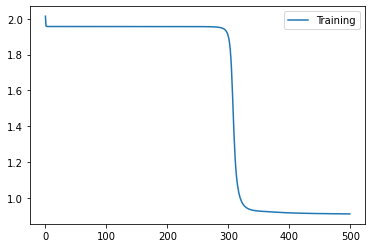

In [9]:
# Implementation of Network using Gradient Descent
epochs = 500
alpha = 0.01
costs = []

batch_data = create_batches(train,batch_size = 20)                   # Update Batch Size here
no_of_batches = len(batch_data)

for num in tqdm(range(epochs)):
    cost_total = 0
    for ba in range(no_of_batches):
        dat = batch_data["batch_"+str(ba)]
        X = dat[:,:p]
        Y = dat[:,p:]
        N = X.shape[0]

        #Forward Propogation
        a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
        h1 = sigmoid(a1)
        a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
        h2 = sigmoid(a2)
        a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
        h3 = softmax(a3)
        # Gradients for Backpropogation
        
        dL_da3 = -( Y.T - h3)
        dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
        dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
        
        dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
        dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
        dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
        dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
        
        dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
        dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
        dL_dW1 = (1/N)*np.dot(dL_da1 , X)
        dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
        
        # GD Updates
        parameters["W3"] = parameters["W3"] - (alpha)*dL_dW3
        parameters["b3"] = parameters["b3"] - (alpha)*dL_db3
        parameters["W2"] = parameters["W2"] - (alpha)*dL_dW2
        parameters["b2"] = parameters["b2"] - (alpha)*dL_db2
        parameters["W1"] = parameters["W1"] - (alpha)*dL_dW1
        parameters["b1"] = parameters["b1"] - (alpha)*dL_db1
        
        cost_total = cost_total + compute_cost(h3.T,Y)
    
    cost_avg = (cost_total/no_of_batches)
    costs.append(cost_avg)

    
print("Training Cost",costs[-1])
plt.plot(costs,label = "Training")
plt.legend()
plt.show()

In [10]:
# Prediction
X = train[:,:p]
Y = train[:,p:]

k= 971
a1 = np.dot(parameters["W1"],X.T)+ parameters["b1"]
h1 = sigmoid(a1)
a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
h2 = sigmoid(a2)
a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
h3 = softmax(a3)
print("Actual",Y[k],"\t Predicted",h3.T[k])

Actual [1. 0. 0. 0.] 	 Predicted [0.11715284 0.18543989 0.2235417  0.47386557]


In [11]:
# Prediction on test set
Xt = test[:,:p]
Yt = test[:,p:]
#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.8447122497135118


In [12]:
# Converting Predictions into lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T

# Checking number of mislables in test set
mislabel_index = []
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1
print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")
print("The accuracy on test set is ",(1-(count/len(YYYY)))*100)

The number of datapoints in test set wrongly labeled by the NN is/are  527 out of total  2700 datapoints
The accuracy on test set is  80.48148148148148


## STOCHASTIC GD


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [14]:
# Read dataset, divide it into train and test set
dataset = np.loadtxt("ClaveVectors_Firm-Teacher_Model.txt")
np.random.shuffle(dataset)

len_dataset = dataset.shape[0]
train = dataset[:int(0.75*len_dataset),:]
test = dataset[int(0.75*len_dataset):,:]

X = train[:,:16]
Y = train[:,16:]
out_neurons=len(Y[0])
N,p = X.shape

Xt = test[:,:16]
Yt = test[:,16:]
Nt,pt = Xt.shape

print("Original Dataset shape ",dataset.shape)
#print("Training set shape ",N,p)
#print("Test set shape ",Nt,pt)

print("Each Datapoint contains ",p,"features and belong to either of ",out_neurons,"class.")

Original Dataset shape  (10800, 20)
Each Datapoint contains  16 features and belong to either of  4 class.


In [15]:
# Function to calculate cost
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [16]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [17]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0)
    return (num / den)

In [18]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [19]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,40,10,out_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [16, 40, 10, 4]


100%|██████████| 50/50 [02:36<00:00,  3.13s/it]


Training Cost 0.15084151851253413


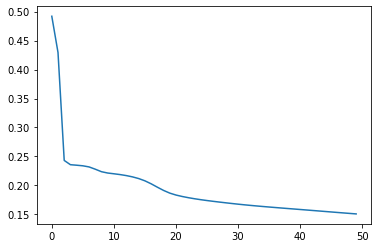

In [20]:
# Implementation of Network using Stochastic Gradient Descent
epochs = 50
alpha = 0.04
costs = []
for num in tqdm(range(epochs)):
    cost_total = 0
    for i in range(len(X)):
        x = X[i]
        x = np.asmatrix(x).T
        y = Y[i]
        y = np.asmatrix(y).T
        #Forward Propogation
        a1 = np.dot(parameters["W1"],x) + parameters["b1"]
        h1 = sigmoid(a1)
        a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
        h2 = sigmoid(a2)
        a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
        h3 = softmax(a3)
        # Gradients for Backpropogation
        
        dL_da3 = -( y - h3)
        dL_dW3 = np.dot(dL_da3 , h2.T)
        dL_db3 = ((dL_da3))
        
        dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
        dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
        dL_dW2 = np.dot(dL_da2 , h1.T)
        dL_db2 = ((dL_da2))
        
        dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
        dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
        dL_dW1 = np.dot(dL_da1 , x.T)
        dL_db1 = ((dL_da1))
        
        # GD Updates
        parameters["W3"] = parameters["W3"] - (alpha)*dL_dW3
        parameters["b3"] = parameters["b3"] - (alpha)*dL_db3
        parameters["W2"] = parameters["W2"] - (alpha)*dL_dW2
        parameters["b2"] = parameters["b2"] - (alpha)*dL_db2
        parameters["W1"] = parameters["W1"] - (alpha)*dL_dW1
        parameters["b1"] = parameters["b1"] - (alpha)*dL_db1
        cost_total = cost_total + compute_cost(h3,y)
        
    cost_avg = cost_total/N
    costs.append(cost_avg)
        
plt.plot(costs)
print("Training Cost",costs[-1])

In [21]:
# Prediction
k= 1020
a1 = np.dot(parameters["W1"],np.asmatrix(X[k]).T)+ parameters["b1"]
h1 = sigmoid(a1)
a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
h2 = sigmoid(a2)
a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
h3 = softmax(a3)
print("Y=",Y[k],"\t\ny=",h3)

Y= [0. 1. 0. 0.] 	
y= [[0.01834289]
 [0.96656049]
 [0.00182554]
 [0.01327108]]


In [22]:
# Prediction on test set
#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.6949029794609515


In [23]:
# Converting Predictions into lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1))

# Checking number of mislables in test set
mislabel_index = []
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1
print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")
print("The accuracy on test set is ",(1-(count/len(YYYY)))*100)

The number of datapoints in test set wrongly labeled by the NN is/are  415 out of total  2700 datapoints
The accuracy on test set is  84.62962962962963
